# Assignment 1: Logistic Regression
Bu çalışmada lojistik regresyon hakkında bilgi edineceğiz. Somut olarak, tweet'lerde duyarlılık analizi için lojistik regresyon uygulayacağız. Bir tweet verildiğinde, olumlu mu yoksa olumsuz mu olduğuna karar vereceğiz. Özellikle şunları yapacağız:

* Bazı metinler verildiğinde lojistik regresyon için özelliklerin nasıl çıkarılacağını öğrenme
* Lojistik regresyonu sıfırdan uygulama
* Doğal bir dil işleme görevinde lojistik regresyon uygulama
* Lojistik regresyonumuzu kullanarak test etme
* Hata analizi yapma

Bir tweet veri seti kullanacağız. Paketlere yüklemek için aşağıdaki hücreyi çalıştıralım.

## Import Functions and Data

In [12]:
# run this cell to import nltk
import nltk
from os import getcwd
import w1_unittest

nltk.download('twitter_samples')
nltk.download('stopwords')

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Imported Functions

Bu çalışma için gerekli verileri indirelim. [Twitter_samples veri kümesi için belgelere](http://www.nltk.org/howto/twitter.html) adresinden ulaşabiliriz.

* twitter_samples: Bu not defterini yerel bilgisayarımızda çalıştırıyorsak, aşağıdakileri kullanarak indirmemiz gerekir:
```Python
nltk.download('twitter_samples')
```

* stopwords: Bu not defterini yerel bilgisayarımızda çalıştırıyorsak, aşağıdakileri kullanarak indirmemiz gerekir:
```python
nltk.download('stopwords')
```

#### Import some helper functions that we provided in the utils.py file:
* process_tweet: process_tweet: metni temizler, ayrı sözcüklere ayırır, stopwords sözcükleri kaldırır ve sözcükleri köklere dönüştürür.
* build_freqs: Bu işlem, 'korpus' adı verilen (tweet setinin tamamı) bir metinde belirli bir kelimenin pozitif etiket '1' veya negatif etiket '0' ile ne sıklıkta ilişkilendirildiğini sayar. Ardından, 'freqs' adlı bir sözlük oluşturulur. Burada her anahtar bir (kelime, etiket) demetidir ve değer, tweetler külliyatındaki o kelimenin belirli etiketle ne sıklıkta görüldüğünün sayısıdır.

In [13]:
filePath = f"{getcwd()}/../tmp2/"
nltk.data.path.append(filePath)

In [14]:
import numpy as np
import pandas as pd
from nltk.corpus import twitter_samples

from utils import process_tweet, build_freqs

### Prepare the Data
* `twitter_samples`  beş bin olumlu tweet, beş bin olumsuz tweet ve tam seti olan 10,000 tweetin alt kümelerini içerir.
    * Eğer üç veri kümesini de kullanırsak, olumlu tweetlerin ve olumsuz tweetlerin tekrarlarını tanımlamış oluruz.
    * adece beş bin olumlu tweet ve beş bin olumsuz tweet seçeceğiz.

In [15]:
# select the set of positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

* Train test split (Eğitim ve test verisi ayırma): Verilerin %20'si test setine, %80'i ise eğitim setine dahil edilecek.

In [16]:
# split the data into two pieces, one for training and one for testing (validation set)
test_pos = all_positive_tweets[4000:]
train_pos = all_positive_tweets[:4000]
test_neg = all_negative_tweets[4000:]
train_neg = all_negative_tweets[:4000]

train_x = train_pos + train_neg
test_x = test_pos + test_neg

* Olumlu etiketlerin ve olumsuz etiketlerin NumPy dizilerini oluşturalım.

In [17]:
# combine positive and negative labels
train_y = np.append(np.ones((len(train_pos), 1)), np.zeros((len(train_neg), 1)), axis=0)
test_y = np.append(np.ones((len(test_pos), 1)), np.zeros((len(test_neg), 1)), axis=0)

In [18]:
# Print the shape train and test sets
print("train_y.shape = " + str(train_y.shape))
print("test_y.shape = " + str(test_y.shape))

train_y.shape = (8000, 1)
test_y.shape = (2000, 1)


* İçe aktarılan build_freqs fonksiyonunu kullanarak frekans sözlüğünü oluşturalım.

```Python
    for y,tweet in zip(ys, tweets):
        for word in process_tweet(tweet):
            pair = (word, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1
```
* Dikkat edelim, dıştaki for döngüsü her bir tweeti gezinir ve içteki for döngüsü her bir tweetteki kelimeyi gezinir.
* 'freqs' sözlüğü, oluşturulan frekans sözlüğüdür.
* Anahtar, ("happy", 1) veya ("happy", 0) gibi demet olan (kelime, etiket) çiftidir. Her bir anahtar için depolanan değer, "happy" kelimesinin pozitif bir etiketle ilişkilendirilme sayısı veya negatif bir etiketle ilişkilendirilme sayısıdır.

In [19]:
# create frequency dictionary
freqs = build_freqs(train_x, train_y)

# check the output
print("type(freqs) = " + str(type(freqs)))
print("len(freqs) = " + str(len(freqs.keys())))

type(freqs) = <class 'dict'>
len(freqs) = 11427


### Process Tweet
Verilen 'process_tweet' fonksiyonu tweet'i ayrıştırarak (tokenize) kelimelere ayırır, stop kelimelerini kaldırır ve stemming işlemi uygular.

In [20]:
# test the function below
print('This is an example of a positive tweet: \n', train_x[0])
print('\nThis is an example of the processed version of the tweet: \n', process_tweet(train_x[0]))

This is an example of a positive tweet: 
 #FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)

This is an example of the processed version of the tweet: 
 ['followfriday', 'top', 'engag', 'member', 'commun', 'week', ':)']


## 1 - Logistic Regression


### 1.1 - Sigmoid
Metin sınıflandırması için lojistik regresyonu kullanmayı öğreneceğiz
* Sigmoid fonksiyonu aşağıdaki gibi tanımlanır:

$$ h(z) = \frac{1}{1+\exp^{-z}} \tag{1}$$

Bu fonksiyon, girdiyi 'z' değerini 0 ile 1 arasında değerlere eşler ve bu nedenle olasılık olarak ele alınabilir.

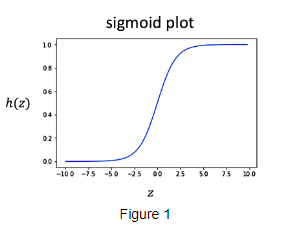

### Exercise 1 -  sigmoid
Sigmoid fonksiyonunu uygulayalım.

* Bu fonksiyonu, z hem bir sayı (scalar) olduğunda hem de bir dizi (array) olduğunda çalışacak şekilde oluşturmalıyız.

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
<p>
<ul>
    <li><a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.exp.html" > numpy.exp </a> </li>

</ul>
</p>

In [87]:
# UNQ_C1 GRADED FUNCTION: sigmoid
def sigmoid(z):
    '''
    Input:
        z: is the input (can be a scalar or an array)
    Output:
        h: the sigmoid of z
    '''

    ### START CODE HERE ###
    # calculate the sigmoid of z
    h = 1 / (1 + np.exp(-z))

    ### END CODE HERE ###

    return h

In [88]:
# Testing your function
if (sigmoid(0) == 0.5):
    print('SUCCESS!')
else:
    print('Oops!')

if (sigmoid(4.92) == 0.9927537604041685):
    print('CORRECT!')
else:
    print('Oops again!')

SUCCESS!
CORRECT!


In [89]:
# Test your function
w1_unittest.test_sigmoid(sigmoid)

 All tests passed


#### Logistic Regression: Regression and a Sigmoid

Lojistik regresyon, düzenli bir lineer regresyonu alır ve lineer regresyonun çıktısına bir sigmoid uygular.

Lineer Regresyon:

$$z = \theta_0 x_0 + \theta_1 x_1 + \theta_2 x_2 + ... \theta_N x_N$$

Burada $\theta$ değerleri "ağırlıklar" olarak adlandırılır. Eğer derin öğrenme uzmanlık dersini aldıysanız, ağırlıklara 'w' vektörü ile atıfta bulunmuş olabilirsiniz. Bu kurs kapsamında, ağırlıklara farklı bir değişken olan $\theta$ ile atıfta bulunuyoruz.

Lojistik Regresyon:
$$ h(z) = \frac{1}{1+\exp^{-z}}$$
$$z = \theta_0 x_0 + \theta_1 x_1 + \theta_2 x_2 + ... \theta_N x_N$$

Burada 'z', 'logit' olarak adlandırılır.

### 1.2 - Cost function and Gradient

Lojistik regresyon için kullanılan maliyet fonksiyonu, tüm eğitim örnekleri için log kaybının ortalamasıdır:

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^m y^{(i)}\log (h(z(\theta)^{(i)})) + (1-y^{(i)})\log (1-h(z(\theta)^{(i)}))\tag{5} $$
* $m$ eğitim örneklerinin sayısıdır.
* $y^{(i)}$  eğitim örneğinin gerçek etiketidir.
* $h(z^{(i)})$  modelin eğitim örneği 'i' için tahminidir.

The loss function for a single training example is (Tek bir eğitim örneği için kayıp fonksiyonu) :
$$ Loss = -1 \times \left( y^{(i)}\log (h(z(\theta)^{(i)})) + (1-y^{(i)})\log (1-h(z(\theta)^{(i)})) \right)$$

* Tüm $h$ değerleri 0 ile 1 arasında olduğundan, logaritmalar negatif olacaktır. Bu nedenle, iki kayıp teriminin toplamına uygulanan -1 faktörüdür.
* Model 1'i ($h(z(\theta)) = 1$) tahmin ettiğinde ve etiket 'y' da 1 olduğunda, o eğitim örneği için kayıp 0 olur.
* Benzer şekilde, model 0'ı ($h(z(\theta)) = 0$) tahmin ederken ve gerçek etiket de 0 olduğunda, o eğitim örneği için kayıp 0 olur.
* Ancak model tahmini 1'e yaklaştığında ($h(z(\theta)) = 0.9999$) ve etiket 0 olduğunda, log kaybının ikinci terimi büyük bir negatif sayı olur ve daha sonra -1 faktörü ile çarpılarak pozitif bir kayıp değerine dönüştürülür. $-1 \times (1 - 0) \times log(1 - 0.9999) \approx 9.2$ Model tahmini 1'e ne kadar yaklaşırsa, kayıp o kadar büyük olur.

In [90]:
# verify that when the model predicts close to 1, but the actual label is 0, the loss is a large positive value
-1 * (1 - 0) * np.log(1 - 0.9999) # loss is about 9.2

9.210340371976294

* Benzer şekilde, eğer model 0'a yakın bir değer tahmin eder ($h(z) = 0.0001$) ancak gerçek etiket 1 ise, kayıp fonksiyonunun ilk terimi büyük bir sayı olur: $-1 \times log(0.0001) \approx 9.2$. Tahmin 0'a ne kadar yakınsa, kayıp o kadar büyük olur.

In [91]:
# verify that when the model predicts close to 0 but the actual label is 1, the loss is a large positive value
-1 * np.log(0.0001) # loss is about 9.2

9.210340371976182

#### Update the weights

Ağırlık vektörümüzü $\theta$ güncellemek için, modelimizin tahminlerini iteratif olarak geliştirmek için gradyan descenti kullanacağız.

Maliyet fonksiyonunun $J$ bir ağırlığa $\theta_j$ göre gradyanı:

$$\nabla_{\theta_j}J(\theta) = \frac{1}{m} \sum_{i=1}^m(h^{(i)}-y^{(i)})x^{(i)}_j \tag{5}$$
* 'i', tüm 'm' eğitim örnekleri üzerindeki indekstir.
* 'j', ağırlık $\theta_j$ indeksidir, bu nedenle $x^{(i)}_j$, ağırlık $\theta_j$ ile ilişkili özelliktir.

* Ağırlık $\theta_j$ güncellemek için, gradyanın $\alpha$ ile belirlenen bir bölümünü çıkararak ayarlarız:
$$\theta_j = \theta_j - \alpha \times \nabla_{\theta_j}J(\theta) $$
* Öğrenme hızı $\alpha$, bir güncellemenin ne kadar büyük olacağını kontrol etmek için seçtiğimiz bir değerdir.


### Exercise 2 - gradientDescent
Gradient descent fonksiyonunu uygulayalım.
* 'num_iters' adlı değişken, tüm eğitim kümesini kaç kez kullanacağımızı belirler.
* Her iterasyonda, tüm eğitim örnekleri (toplam 'm' eğitim örneği) ve tüm özellikler için maliyet fonksiyonunu hesaplayacağız.
* Bir seferde tek bir ağırlığı $\theta_i$ güncellemek yerine, sütun vektöründe tüm ağırlıkları güncelleyebiliriz:  
$$\mathbf{\theta} = \begin{pmatrix}
\theta_0
\\
\theta_1
\\
\theta_2
\\
\vdots
\\
\theta_n
\end{pmatrix}$$
* $\mathbf{\theta}$, boyutları (n+1, 1) olan bir vektördür, burada 'n' özellik sayısıdır ve $\theta_0$ için bir tane daha öğe vardır (ilgili özellik değeri $\mathbf{x_0}$ not edin ki bu 1'dir).
* 'Logit'ler, 'z', özellik matrisi 'x' ile ağırlık vektörü 'theta'yi çarparak hesaplanır. $z = \mathbf{x}\mathbf{\theta}$
    * $\mathbf{x}$ boyutları (m, n+1)
    * $\mathbf{\theta}$ boyutları (n+1, 1)
    * $\mathbf{z}$ boyutları (m, 1)
* Tahmin 'h', 'z' içindeki her bir öğeye sigmoid uygulayarak hesaplanır: $h(z) = sigmoid(z)$, ve boyutları (m, 1)'dir.
* Maliyet fonksiyonu $J$, 'y' ve 'log(h)' vektörlerinin dot ürünü alınarak hesaplanır. 'y' ve 'h' her ikisi de sütun vektörleridir (m,1), dolayısıyla matris çarpımı yapmak için vektörü sola transpoze edin ve böylece bir satır vektörün bir sütun vektör ile dot ürününü gerçekleştirir.
$$J = \frac{-1}{m} \times \left(\mathbf{y}^T \cdot log(\mathbf{h}) + \mathbf{(1-y)}^T \cdot log(\mathbf{1-h}) \right)$$
* Aynı şekilde, $\mathbf{x}$ boyutları (m, n+1) ve hem $\mathbf{h}$ hem de $\mathbf{y}$ (m, 1) boyutlarındadır, bu nedenle $\mathbf{x}$'i transpoze edip matris çarpımı yapmak için sola koymanız gerekir, bu da (n+1, 1) boyutunda bir sonuç elde ederiz:
$$\mathbf{\theta} = \mathbf{\theta} - \frac{\alpha}{m} \times \left( \mathbf{x}^T \cdot \left( \mathbf{h-y} \right) \right)$$

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
<p>
<ul>
    <li>Matrix çarpımı için numpy.dot kullanalım.</li>
    <li>Kesirin -1/m ondalık bir değer olmasını sağlamak için pay veya payda (veya ikisini) ondalık bir değere dönüştürelim, örneğin float(1) olarak veya 1. şeklinde float sürümü için yazalım. </li>
</ul>
</p>

In [94]:
# UNQ_C2 GRADED FUNCTION: gradientDescent
def gradientDescent(x, y, theta, alpha, num_iters):
  '''
    Input:
      x: matrix of features which is (m,n+1)
      y: corresponding labels of the input matrix x, dimensions (m,1)
      theta: weight vector of dimension (n+1,1)
      alpha: learning rate
      num_iters: number of iterations you want to train your model for
    Output:
      J: the final cost
      theta: your final weight vector
    Hint: you might want to print the cost to make sure that it is going down.
  '''
  ### START CODE HERE ###
  # get 'm', the number of rows in matrix x
  m = x.shape[0]

  for i in range(0, num_iters):

    # get z, the dot product of x and theta
    z = np.dot(x,theta)

    # get the sigmoid of z
    h = sigmoid(z)

    # calculate the cost function
    J = -1/m * (np.dot(y.transpose(), np.log(h)) + np.dot((1-y).transpose(),np.log(1-h)))

    # update the weights theta
    theta = theta - (alpha/m) * np.dot(x.transpose(),(h-y))

  ### END CODE HERE ###
  J = float(J)

  return J, theta

In [95]:
# Check the function
# Construct a synthetic test case using numpy PRNG functions
np.random.seed(1)
# X input is 10 x 3 with ones for the bias terms
tmp_X = np.append(np.ones((10, 1)), np.random.rand(10, 2) * 2000, axis=1)

# Y Labels are 10 x 1
tmp_Y = (np.random.rand(10, 1) > 0.35).astype(float)

# Apply gradient descent
tmp_J, tmp_theta = gradientDescent(tmp_X, tmp_Y, np.zeros((3, 1)), 1e-8, 700)
print(f"The cost after training is {tmp_J:.8f}.")
print(f"The resulting vector of weights is {[round(t, 8) for t in np.squeeze(tmp_theta)]}")

The cost after training is 0.67094970.
The resulting vector of weights is [4.1e-07, 0.00035658, 7.309e-05]


In [96]:
# Test your function
w1_unittest.test_gradientDescent(gradientDescent)

 All tests passed


## 2 - Extracting the Features

* Verilen tweetlerin bir listesi için, özellikleri çıkaralım ve bunları bir matrise depolayalım. İki özellik çıkaracağız.
    * İlk özellik, bir tweetteki olumlu kelimelerin sayısıdır.
    * İkinci özellik, bir tweetteki olumsuz kelimelerin sayısıdır.
* Daha sonra bu özellikler üzerinde lojistik regresyon sınıflandırıcımızı eğitelim.
* Sınıflandırıcıyı bir doğrulama kümesinde test edelim.


### Exercise 3 - extract_features
extract_features fonksiyonunu uygulayalım.
* Bu fonksiyon, tek bir tweet'i alır.
* İçe aktarılan process_tweet fonksiyonunu kullanarak tweet'i işleyelim ve tweet kelimelerinin listesini kaydedelim.
* İşlenmiş kelimeler listesindeki her kelime için:
    * Her kelime için, 'freqs' sözlüğünde olumlu '1' etiketiyle ilişkilendirildiğinde o kelimenin sayısını kontrol edelim (Anahtar için (kelime, 1.0) kontrol edelim.)
    * Aynı şekilde, kelimenin olumsuz etiket '0' ile ilişkilendirildiğinde sayısını kontrol edelim (Anahtar için (kelime, 0.0) kontrol edelim.)

Not: Yukarıda verilen uygulama talimatlarında, olumlu veya olumsuz olma tahmini, özellik vektörüne bağlıdır.

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
<p>
<ul>
    <li>Sözlükte (kelime, etiket) anahtarının bulunmadığı durumları ele aldığımızdan emin olalım. </li>
    <li> Bir Python sözlüğünün 'get' işlevini kullanmayla ilgili ipuçları için web'de arama yapalım. İşte bir <a href="https://www.programiz.com/python-programming/methods/dictionary/get" > örneği </a> </li>
</ul>
</p>

In [97]:
# UNQ_C3 GRADED FUNCTION: extract_features
def extract_features(tweet, freqs, process_tweet=process_tweet):
    '''
    Input:
        tweet: a list of words for one tweet
        freqs: a dictionary corresponding to the frequencies of each tuple (word, label)
    Output:
        x: a feature vector of dimension (1,3)
    '''
    # process_tweet tokenizes, stems, and removes stopwords
    word_l = process_tweet(tweet)

    # 3 elements for [bias, positive, negative] counts
    x = np.zeros(3)

    # bias term is set to 1
    x[0] = 1

    ### START CODE HERE ###

    # loop through each word in the list of words
    for word in word_l:

        # increment the word count for the positive label 1
        x[1] += freqs.get((word, 1.0),0)

        # increment the word count for the negative label 0
        x[2] += freqs.get((word, 0.0),0)

    ### END CODE HERE ###

    x = x[None, :]  # adding batch dimension for further processing
    assert(x.shape == (1, 3))
    return x

In [98]:
# Check your function
# test 1
# test on training data
tmp1 = extract_features(train_x[0], freqs)
print(tmp1)

[[1.000e+00 3.133e+03 6.100e+01]]


In [99]:
# test 2:
# check for when the words are not in the freqs dictionary
tmp2 = extract_features('blorb bleeeeb bloooob', freqs)
print(tmp2)

[[1. 0. 0.]]


In [100]:
# Test your function
w1_unittest.test_extract_features(extract_features, freqs)

 All tests passed


## 3 - Training Our Model

Modelimizi eğitmek için:
* Tüm eğitim örnekleri için özellikleri bir X matrisinde istifleyelim.
* Yukarıda uyguladığımız `gradientDescent` i çağıralım.

In [101]:
# collect the features 'x' and stack them into a matrix 'X'
X = np.zeros((len(train_x), 3))
for i in range(len(train_x)):
    X[i, :]= extract_features(train_x[i], freqs)

# training labels corresponding to X
Y = train_y

# Apply gradient descent
J, theta = gradientDescent(X, Y, np.zeros((3, 1)), 1e-9, 1500)
print(f"The cost after training is {J:.8f}.")
print(f"The resulting vector of weights is {[round(t, 8) for t in np.squeeze(theta)]}")

The cost after training is 0.22521264.
The resulting vector of weights is [6e-08, 0.0005382, -0.0005583]


<a name='4'></a>
## 4 -  Test our Logistic Regression

Modelimizin daha önce görmediği bazı yeni girdiler üzerinde lojistik regresyon işlevimizi test etmenin zamanı geldi.

### Exercise 4 - predict_tweet
`predict_tweet` uygulayalım.
Bir tweet'in olumlu mu yoksa olumsuz mu olduğunu tahmin edelim.

* Verilen bir tweet'i işleyelim, ardından özelliklerini çıkaralım.
* Logitleri elde etmek için modelin öğrenilen ağırlıklarını özelliklere uygulayalım.
* Tahmini elde etmek için sigmoid'i logitlere uygulayalım (0 ile 1 arasında bir değer).

$$y_{pred} = sigmoid(\mathbf{x} \cdot \theta)$$

In [102]:
# UNQ_C4 GRADED FUNCTION: predict_tweet
def predict_tweet(tweet, freqs, theta):
    '''
    Input:
        tweet: a string
        freqs: a dictionary corresponding to the frequencies of each tuple (word, label)
        theta: (3,1) vector of weights
    Output:
        y_pred: the probability of a tweet being positive or negative
    '''
    ### START CODE HERE ###

    # extract the features of the tweet and store it into x
    x = extract_features(tweet,freqs)

    # make the prediction using x and theta
    y_pred = sigmoid(np.dot(x,theta))

    ### END CODE HERE ###

    return y_pred

In [103]:
# Run this cell to test your function
for tweet in ['I am happy', 'I am bad', 'this movie should have been great.', 'great', 'great great', 'great great great', 'great great great great']:
    print( '%s -> %f' % (tweet, predict_tweet(tweet, freqs, theta)))


I am happy -> 0.519275
I am bad -> 0.494347
this movie should have been great. -> 0.515980
great -> 0.516065
great great -> 0.532097
great great great -> 0.548063
great great great great -> 0.563930


In [104]:
# Feel free to check the sentiment of your own tweet below
my_tweet = 'I am learning :)'
predict_tweet(my_tweet, freqs, theta)

array([[0.83110764]])

In [105]:
# Test your function
w1_unittest.test_predict_tweet(predict_tweet, freqs, theta)

 All tests passed


### 4.1 -  Check the Performance using the Test Set
Yukarıdaki eğitim setini kullanarak modelimizi eğittikten sonra, modelimizi test setiyle test ederek gerçek, görünmeyen veriler üzerinde nasıl performans gösterebileceğini kontrol edelim.


### Exercise 5 - test_logistic_regression
`test_logistic_regression` u uygulama.
* Eğitilen modelimizin test verileri ve ağırlıkları göz önüne alındığında, lojistik regresyon modelimizin doğruluğunu hesaplayalım.
* Test setindeki her tweet için tahminde bulunmak için 'predict_tweet' işlevimizi kullanalım.
* Tahmin > 0,5 ise, modelin 'y_hat' sınıflandırmasını 1 olarak ayarlayalım, aksi halde modelin 'y_hat' sınıflandırmasını 0 olarak ayarlayalım.
* Bir tahmin, y_hat, test_y'ye eşit olduğunda doğrudur. Eşit olduklarında tüm örnekleri toplayalım ve m'ye bölelim.


<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
<p>
<ul>
    <li>Bir listeyi bir numpy dizisine dönüştürmek için np.asarray() kullanalım.</li>
    <li>Bir (m,1) boyutlu diziyi bir (m,) dizisine dönüştürmek için numpy.squeeze() işlevini kullanalım. </li>
</ul>
</p>

In [106]:
# UNQ_C5 GRADED FUNCTION: test_logistic_regression
def test_logistic_regression(test_x, test_y, freqs, theta, predict_tweet=predict_tweet):
    """
    Input:
        test_x: a list of tweets
        test_y: (m, 1) vector with the corresponding labels for the list of tweets
        freqs: a dictionary with the frequency of each pair (or tuple)
        theta: weight vector of dimension (3, 1)
    Output:
        accuracy: (# of tweets classified correctly) / (total # of tweets)
    """

    ### START CODE HERE ###

    # the list for storing predictions
    y_hat = []

    for tweet in test_x:
        # get the label prediction for the tweet
        y_pred = predict_tweet(tweet, freqs, theta)

        if y_pred > 0.5:
            # append 1.0 to the list
            y_hat.append(1)
        else:
            # append 0 to the list
            y_hat.append(0)

    # With the above implementation, y_hat is a list, but test_y is (m,1) array
    # convert both to one-dimensional arrays in order to compare them using the '==' operator
    accuracy = (y_hat==np.squeeze(test_y)).sum()/len(test_x)


    ### END CODE HERE ###

    return accuracy

In [107]:
tmp_accuracy = test_logistic_regression(test_x, test_y, freqs, theta)
print(f"Logistic regression model's accuracy = {tmp_accuracy:.4f}")

Logistic regression model's accuracy = 0.9950


In [108]:
# Test your function
w1_unittest.unittest_test_logistic_regression(test_logistic_regression, freqs, theta)

 All tests passed


## 5 -  Error Analysis

Bu bölümde, modelimizin yanlış sınıflandırdığı bazı tweet'leri göreceğiz.

In [109]:
# Some error analysis done for you
print('Label Predicted Tweet')
for x,y in zip(test_x,test_y):
    y_hat = predict_tweet(x, freqs, theta)

    if np.abs(y - (y_hat > 0.5)) > 0:
        print('THE TWEET IS:', x)
        print('THE PROCESSED TWEET IS:', process_tweet(x))
        print('%d\t%0.8f\t%s' % (y, y_hat, ' '.join(process_tweet(x)).encode('ascii', 'ignore')))

Label Predicted Tweet
THE TWEET IS: @MarkBreech Not sure it would be good thing 4 my bottom daring 2 say 2 Miss B but Im gonna be so stubborn on mouth soaping ! #NotHavingit :p
THE PROCESSED TWEET IS: ['sure', 'would', 'good', 'thing', '4', 'bottom', 'dare', '2', 'say', '2', 'miss', 'b', 'im', 'gonna', 'stubborn', 'mouth', 'soap', 'nothavingit', ':p']
1	0.48942981	b'sure would good thing 4 bottom dare 2 say 2 miss b im gonna stubborn mouth soap nothavingit :p'
THE TWEET IS: I'm playing Brain Dots : ) #BrainDots
http://t.co/UGQzOx0huu
THE PROCESSED TWEET IS: ["i'm", 'play', 'brain', 'dot', 'braindot']
1	0.48418981	b"i'm play brain dot braindot"
THE TWEET IS: I'm playing Brain Dots : ) #BrainDots http://t.co/aOKldo3GMj http://t.co/xWCM9qyRG5
THE PROCESSED TWEET IS: ["i'm", 'play', 'brain', 'dot', 'braindot']
1	0.48418981	b"i'm play brain dot braindot"
THE TWEET IS: I'm playing Brain Dots : ) #BrainDots http://t.co/R2JBO8iNww http://t.co/ow5BBwdEMY
THE PROCESSED TWEET IS: ["i'm", 'play', 

<a name='6'></a>
## 6 - Predict with your own Tweet

In [110]:
# Feel free to change the tweet below
my_tweet = 'This is a ridiculously bright movie. The plot was terrible and I was sad until the ending!'
print(process_tweet(my_tweet))
y_hat = predict_tweet(my_tweet, freqs, theta)
print(y_hat)
if y_hat > 0.5:
    print('Positive sentiment')
else:
    print('Negative sentiment')

['ridicul', 'bright', 'movi', 'plot', 'terribl', 'sad', 'end']
[[0.48125421]]
Negative sentiment
